# <font black=red> __SVM(SUPPORT VECTOR MACHINE)__</font>

<font color=green>__Support Vector Machine (SVM) is a powerful machine learning algorithm used for linear or nonlinear classification, regression, and even outlier detection tasks. SVMs can be used for a variety of tasks, such as text classification, image classification, spam detection, handwriting identification, gene expression analysis, face detection, and anomaly detection. SVMs are adaptable and efficient in a variety of applications because they can manage high-dimensional data and nonlinear relationships. SVM algorithms are very effective as we try to find the maximum separating hyperplane between the different classes available in the target feature.__</font>

<font color='grey'>_I used the "Churn_telecom" dataset which downloaded from the Kaggle._<br>
_Libraries used - Pandas, NumPy, Seaborn, and Matplotlib._<br>
_Algorithm - SVM from the SkLearn._</font>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt

In [64]:
#Reading the DataSet
churn=pd.read_csv('churn_telecom.csv')

In [65]:
# Checking the first five data rows in the DataSet for overview
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


C:\Users\mohdo\AppData\Local\Temp\ipykernel_16668\3832504706.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn['tenure'], color='red')


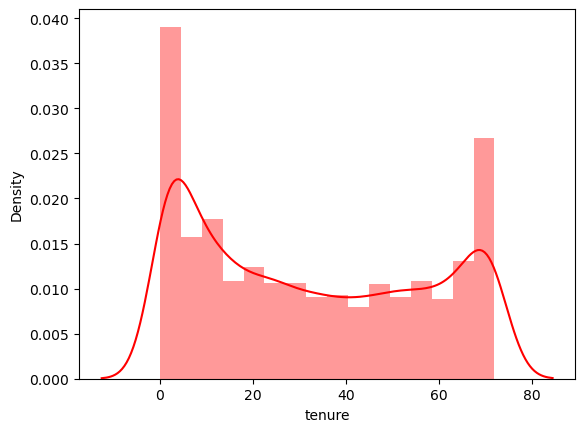

In [11]:
sns.distplot(churn['tenure'], color='red')
plt.show()

In [12]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
# Check how many people in favour of Paperless Billing
churn['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [16]:
churn['PaperlessBilling'].value_counts().keys()

Index(['Yes', 'No'], dtype='object')

In [17]:
churn['PaperlessBilling'].value_counts().values

array([4171, 2872], dtype=int64)

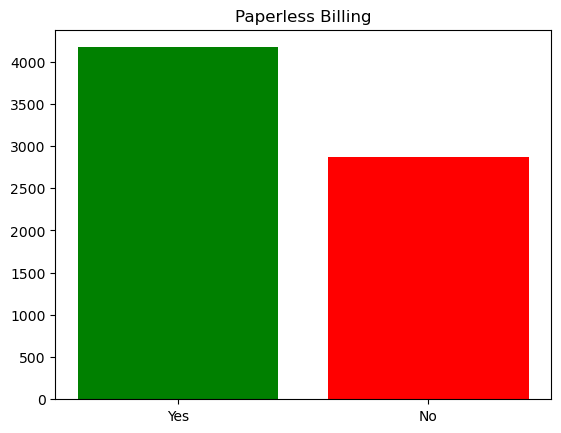

In [19]:
# Visulazing the Paperless Billing in the form of Bar Graph
plt.bar(list(churn['PaperlessBilling'].value_counts().keys()),list(churn['PaperlessBilling'].value_counts()),color=['green','red'])
plt.title("Paperless Billing")
plt.show()

In [20]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Payment Method mode people likes
churn['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

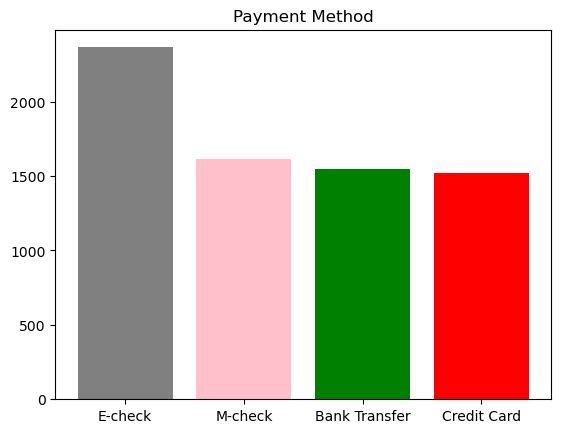

In [24]:
# Visualizing for simple understanding in form bar Graph, here we can cleary see that most of the people like to in Electronic Check
plt.bar(list(("E-check","M-check","Bank Transfer","Credit Card")),list(churn['PaymentMethod'].value_counts()),color=["grey","pink","green","red"])
plt.title("Payment Method")
plt.show()

In [25]:
#Contracts - Month-to-Month contracts are most chosen
churn['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

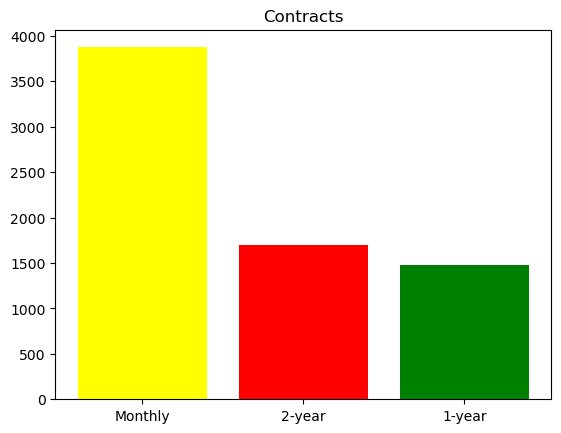

In [27]:
plt.bar(list(("Monthly","2-year","1-year")),list(churn['Contract'].value_counts()),color=["yellow","red","green"])
plt.title("Contracts")
plt.show()

In [28]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [35]:
# geeting the 'tenure' value as an independent variable
x=churn[['tenure']]

In [41]:
# geeting the 'Churn' value as a dependent variable
y=churn[['Churn']]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Spliting in test and train dataSet 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [45]:
from sklearn.svm import SVC

In [46]:
# declaring support vector classifier in svc varible
svc=SVC()

In [47]:
svc.fit(x_train,y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [59]:
# predicting the values of x_test in y_pred
y_pred=svc.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix

In [62]:
#confusion_matrix for checking the accuracy of the MOdel
confusion_matrix(y_test,y_pred)

array([[1155,  153],
       [ 283,  170]], dtype=int64)

In [63]:
#Accuracy
(1155+170)/(1155+153+283+170)


0.7524134014764339

# Accuracy of our Model is 75% which is quite good 

# This is about SVM 
# Thank You